# Imports

In [1]:
%load_ext autoreload

%autoreload 2
import os
import sys
from napari_convpaint.conv_paint_utils import *
from napari_convpaint.conv_paint_model import *
from napari_convpaint.conv_paint_param import Param
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import napari
from skimage import morphology
import seaborn as sns
import pandas as pd

Import from Cellpose 3 notebook

In [2]:
!nvcc --version
!nvidia-smi

import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
from glob import glob

use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

'nvcc' is not recognized as an internal or external command,
operable program or batch file.
'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


>>> GPU activated? NO


In [3]:
%load_ext autoreload

%autoreload 2
from vetsuisse25_imaging import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
>>> GPU activated? NO


# Load data

(960, 960, 3)
0 255 0 255 0 255
[5.274574652777778, 0.0, 5.274574652777778]


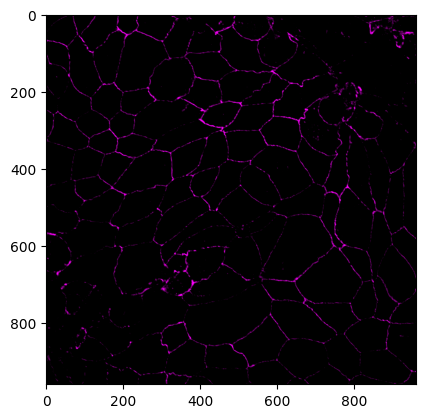

In [4]:
# img = np.array(Image.open("C:/Users/roman/Documents/Convpaint/hinderling-cp/Cells 2D.tif"))
img = np.array(Image.open("C:/Users/roman/Documents/Vetsuisse/imaging_data/2022.10_IAV - Figure_7 - D_2405 - 36h - WT/C3-MAX_1518_2405_WT_36hpi_001_R3D_D3D-1.tif"))
plt.imshow(img)
print(img.shape)
print(np.min(img[0]), np.max(img[0]), np.min(img[1]), np.max(img[1]), np.min(img[2]), np.max(img[2]))
print([img[:,:,c].mean() for c in range(img.shape[2])])

(960, 960)


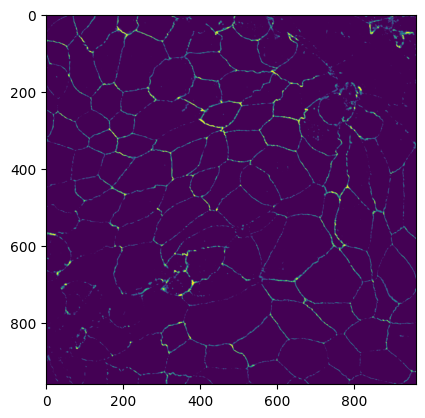

In [5]:
img_singleCh = img[:,:,0]
plt.imshow(img_singleCh)
print(img_singleCh.shape)

# Run cellpose denoising and segmentation

Specify diameter of objects and run model

In [15]:
mask, flows, style, img_dn, outline = segment(img_singleCh, 100)

>>> GPU activated? NO


In [16]:
print(mask.shape, img_dn.shape, outline.shape)
print(flows[0].shape, style.shape)
print(mask.min(), mask.max())

(960, 960) (960, 960, 1) (960, 960)
(960, 960, 3) (256,)
0 116


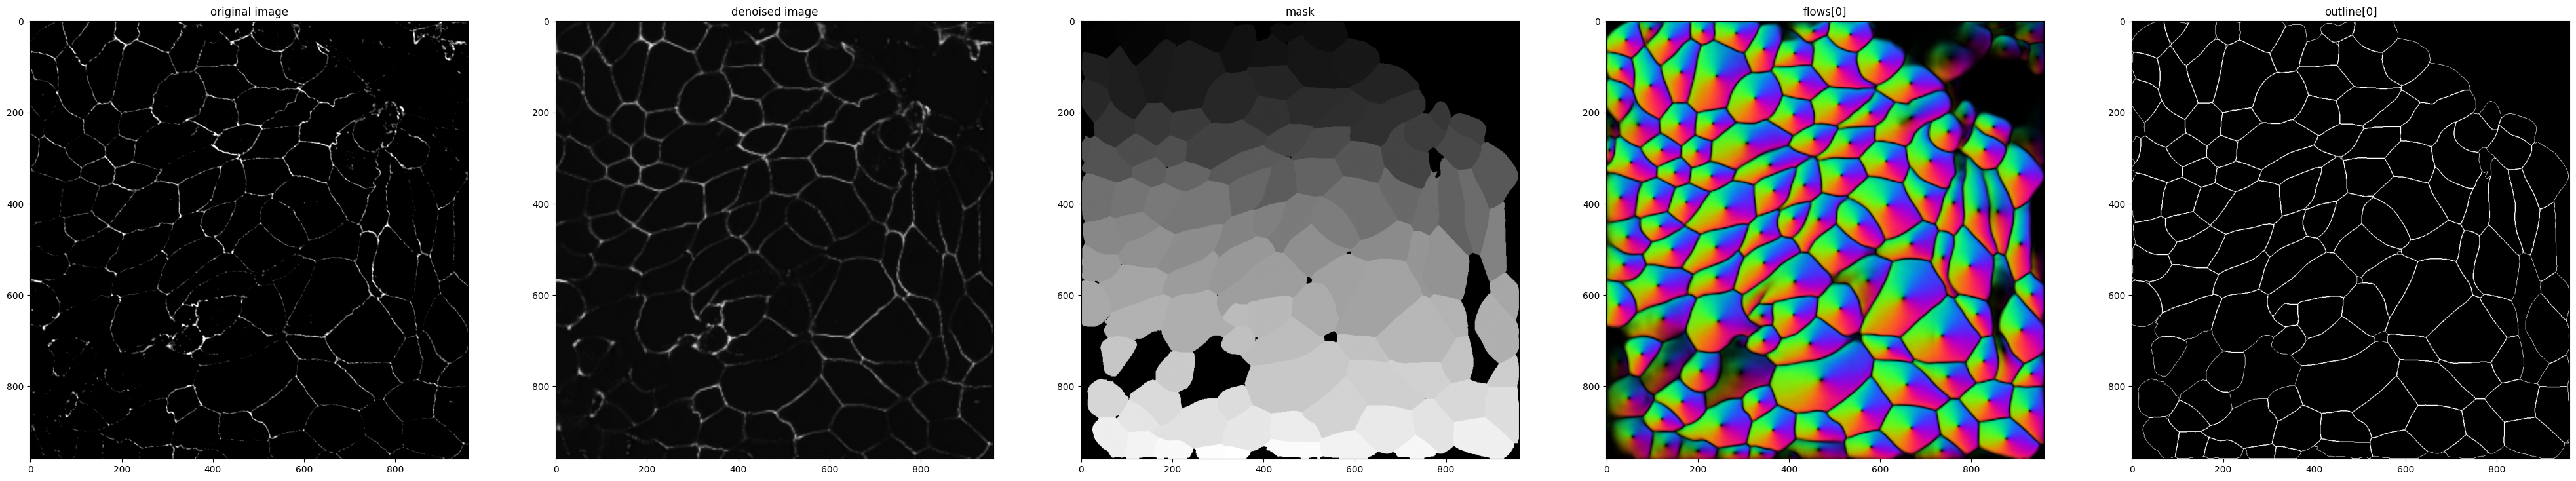

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(50,20))
ax[0].imshow(img_singleCh, cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(img_dn, cmap='gray')
ax[1].set_title('denoised image')
ax[2].imshow(mask, cmap='gray')
ax[2].set_title('mask')
ax[3].imshow(flows[0], cmap='gray')
ax[3].set_title('flows[0]')
ax[4].imshow(outline, cmap='gray')
ax[4].set_title('outline')
# plt.tight_layout()
plt.show()

In [16]:
# v = napari.Viewer()
# v.add_image(img_singleCh, name='Ch4', colormap='gray')
# v.add_labels(mask[0], name='mask')

# For each cell, analyse for signal

### Open signal data

(960, 960, 3)
[(0, 0), (0, 255), (0, 0)]
[0.0, 7.332833116319445, 0.0]


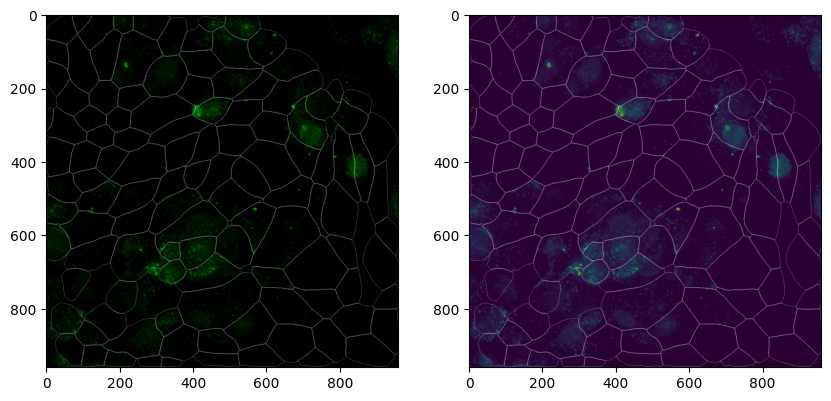

In [24]:
signal_img = np.array(Image.open("C:/Users/roman/Documents/Vetsuisse/imaging_data/2022.10_IAV - Figure_7 - D_2405 - 36h - WT/C2-MAX_1518_2405_WT_36hpi_001_R3D_D3D-1.tif"))
signal_img_singleCh = signal_img[:,:,1]

# signal_img = np.array(Image.open("C:/Users/roman/Documents/Vetsuisse/imaging_data/2022.10_IAV - Figure_7 - D_2405 - 36h - WT/C4-MAX_1518_2405_WT_36hpi_001_R3D_D3D-1.tif"))
# signal_img_singleCh = signal_img[:,:,0]

print(signal_img.shape)
print([(np.min(signal_img[:,:,c]), np.max(signal_img[:,:,c])) for c in range(3)])
print([signal_img[:,:,c].mean() for c in range(signal_img.shape[2])])

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(signal_img)
ax[0].imshow(outline, cmap="gray", alpha=0.4)
ax[1].imshow(signal_img_singleCh)
ax[1].imshow(outline, cmap="gray", alpha=0.4)
plt.show()

### Show masks

1 : 0 34 0.00014322916666666667
2 : 0 0 0.0
3 : 0 255 0.019943576388888887
4 : 0 71 0.05092881944444445
5 : 0 72 0.029342447916666667
6 : 0 218 0.06320855034722223


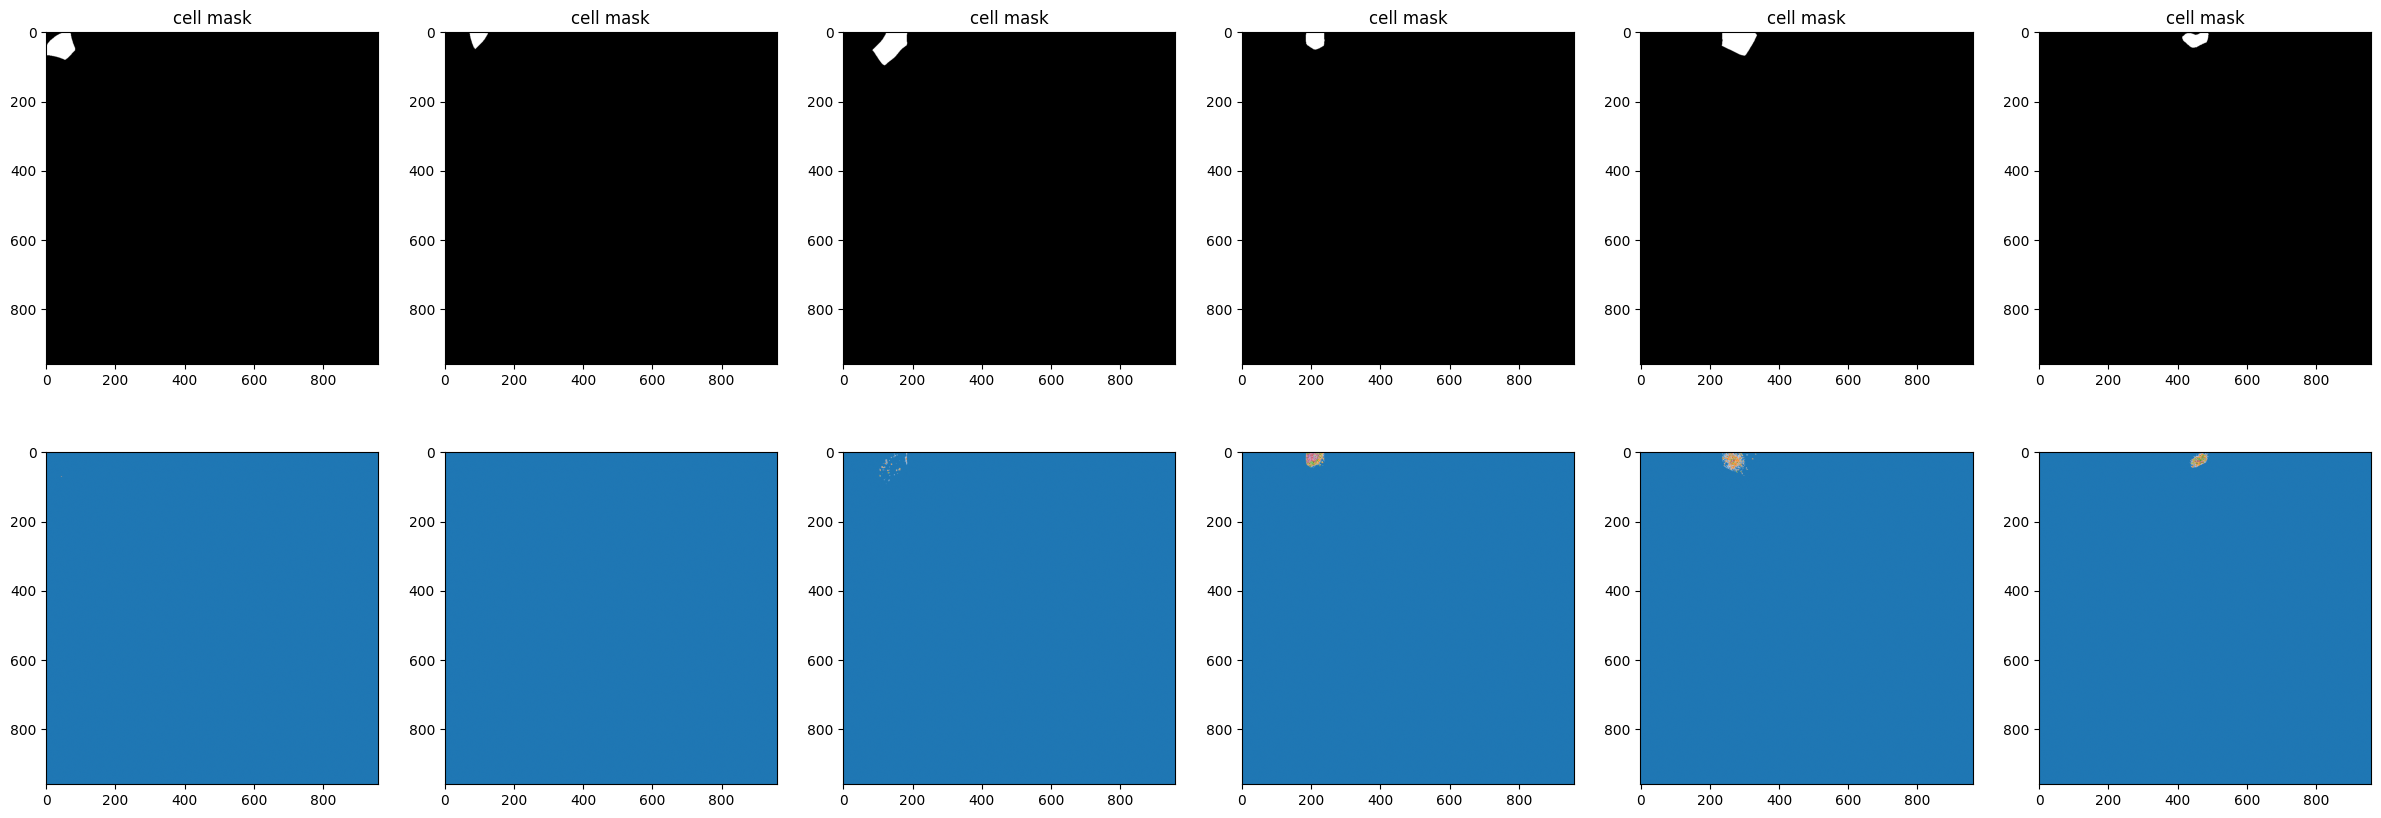

In [18]:
num_ids = 6
fig, ax = plt.subplots(2, num_ids, figsize=(5*num_ids, 10))
for id in range(num_ids):
    cell_mask = mask == id+1
    masked_img = signal_img_singleCh * cell_mask
    
    print(id+1, ":", np.min(masked_img), np.max(masked_img), np.mean(masked_img))

    ax[0, id].imshow(cell_mask, cmap='gray')
    ax[0, id].set_title('cell mask')
    ax[1, id].imshow(masked_img, cmap='tab20')

### Get the mean of each cell

Numbering correct? True
{1: 0.027684563758389263, 2: 0.0, 3: 3.0761506276150627, 4: 19.157551020408164, 5: 5.1646294881589, 6: 24.17136929460581, 7: 34.580890538033394, 8: 2.715631196298744, 9: 9.682065809544563, 10: 15.14784305224366, 11: 7.980320125951194, 12: 1.4572844134975897, 13: 10.879291959906164, 14: 0.12229066849190053, 15: 0.0, 16: 3.356106106106106, 17: 1.0621737795517348, 18: 14.490331227264024, 19: 0.18288669487541137, 20: 10.643453344960758, 21: 1.7901408450704226, 22: 8.402844898331358, 23: 5.701210158513721, 24: 0.0, 25: 2.037037037037037, 26: 0.891350584898972, 27: 1.597667638483965, 28: 15.220669363736668, 29: 2.5910014513788098, 30: 2.4014543630892677, 31: 45.04303097345133, 32: 59.99607535321821, 33: 4.666198419666374, 34: 0.3381236880348781, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 2.9242919389978215, 40: 0.18569539343178312, 41: 0.5348042704626335, 42: 0.0, 43: 0.0, 44: 14.202145124220204, 45: 0.6412649763165227, 46: 0.0, 47: 0.06757624398073836, 48: 6.86619718309

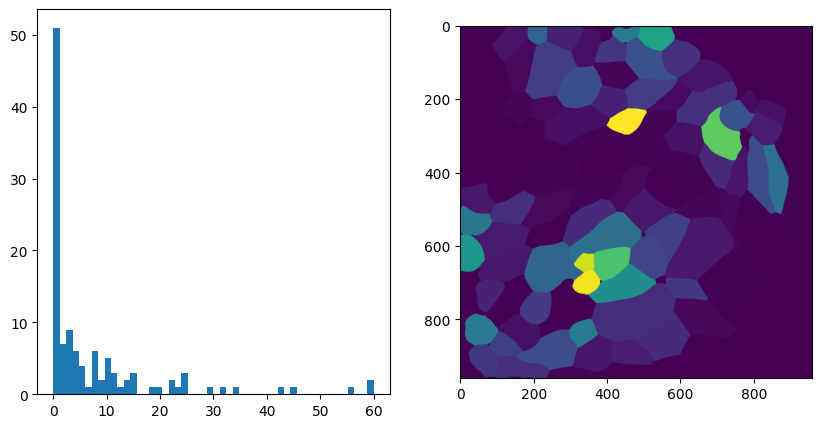

In [19]:
signal_means, signal_means_list, signal_means_mask = get_means(signal_img_singleCh, mask)

cell_ids = np.unique(mask)
print("Numbering correct?", len(signal_means)==len(cell_ids)-1)
print(signal_means)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].hist(signal_means_list, bins=50)
ax[1].imshow(signal_means_mask, cmap='viridis')
plt.show()

### Bin cells

In [20]:
print("Mean:", np.mean(signal_means_list))
print("Median:", np.median(signal_means_list))
print("Perc 75:", np.percentile(signal_means_list, 75))
print("Perc 90:", np.percentile(signal_means_list, 90))
print("Otsu:", threshold_otsu(np.array(signal_means_list)))
# thresh = np.percentile(signal_means_list, 75)
# thresh = np.percentile(signal_means_list, 90)
thresh = threshold_otsu(np.array(signal_means_list))

Mean: 7.535999815061669
Median: 2.2192457000631522
Perc 75: 9.64278319811774
Perc 90: 22.81694536795443
Otsu: 15.116198672978808


In [21]:
signal_bins, signal_bins_list, signal_bins_mask = get_bins(signal_means, thresh, mask)

In [22]:
print(signal_bins)
for val in np.unique(signal_bins_list):
    print(val, signal_bins_list.count(val))

{1: 1, 2: 1, 3: 1, 4: 2, 5: 1, 6: 2, 7: 2, 8: 1, 9: 1, 10: 2, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 2, 29: 1, 30: 1, 31: 2, 32: 2, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 2, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 2, 71: 1, 72: 2, 73: 1, 74: 1, 75: 1, 76: 1, 77: 2, 78: 1, 79: 2, 80: 1, 81: 1, 82: 1, 83: 1, 84: 2, 85: 2, 86: 2, 87: 2, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 2, 98: 1, 99: 1, 100: 2, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1}
1 98
2 18


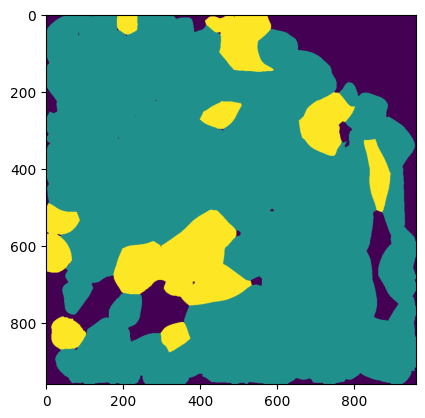

In [23]:
plt.imshow(signal_bins_mask)
plt.show()

In [24]:
# v = napari.Viewer()
# v.add_image(signal_img_singleCh, name='Ch4', colormap='gray')
# v.add_labels(signal_bins_mask, name='mask')

### Show what dilation does...

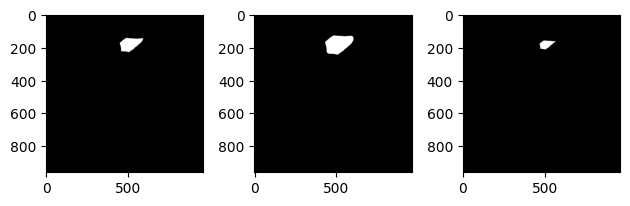

In [25]:
cell_mask = mask == 20
plt.subplot(1,3,1)
plt.imshow(cell_mask, cmap='gray')
plt.subplot(1,3,2)
cell_mask_dilated = morphology.binary_dilation(cell_mask, morphology.disk(15))
cell_mask_eroded = morphology.binary_erosion(cell_mask, morphology.disk(15))
plt.imshow(cell_mask_dilated, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(cell_mask_eroded, cmap='gray')
plt.tight_layout()
plt.show()

# Do it all quickly on 2 signals and get overlap information

### Imports

In [26]:
%load_ext autoreload
%autoreload 2
from vetsuisse25_imaging import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import napari
from skimage.filters import threshold_otsu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load data

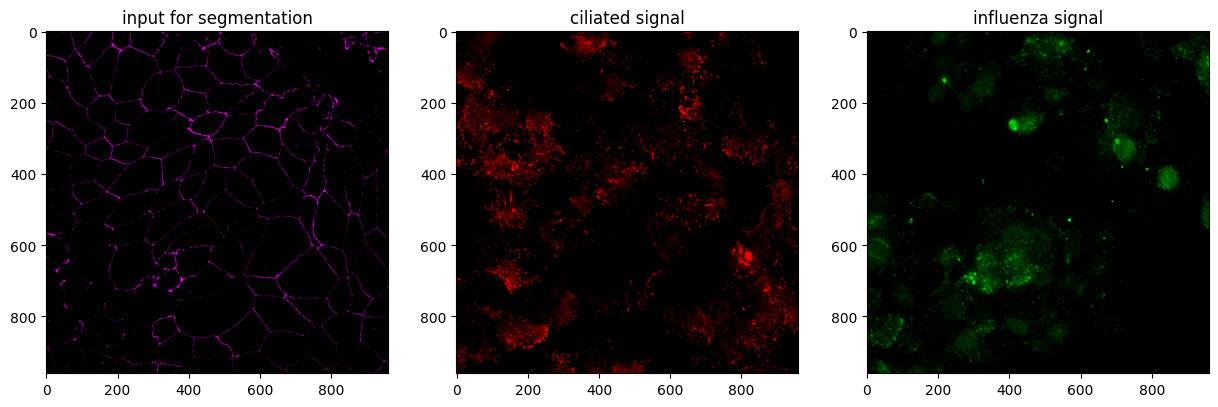

In [27]:
folder = "C:/Users/roman/Documents/Vetsuisse/imaging_data/2022.10_IAV - Figure_7 - D_2405 - 36h - WT/"
seg_img = read_image(folder + "C3-MAX_1518_2405_WT_36hpi_001_R3D_D3D-1.tif")
signal_cil = read_image(folder + "C4-MAX_1518_2405_WT_36hpi_001_R3D_D3D-1.tif")
signal_inf = read_image(folder + "C2-MAX_1518_2405_WT_36hpi_001_R3D_D3D-1.tif")
# folder = "C:/Users/roman/Documents/Vetsuisse/imaging_data/2022.10_IAV - Figure_7 - D_1904 - 36hpi - NS1/"
# seg_img = read_image(folder + "C3-MAX_1518_1904_NS1_36hpi_002_R3D_D3D-1.tif")
# signal_cil = read_image(folder + "C4-MAX_1518_1904_NS1_36hpi_002_R3D_D3D-1.tif")
# signal_inf = read_image(folder + "C2-MAX_1518_1904_NS1_36hpi_002_R3D_D3D-1.tif")

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(seg_img)
ax[0].set_title('input for segmentation')
ax[1].imshow(signal_cil)
ax[1].set_title('ciliated signal')
ax[2].imshow(signal_inf)
ax[2].set_title('influenza signal')
plt.show()

### Segment

Get the segmentation mask

In [ ]:
diam = 100
mask, flows, styles, img_dn, outlines = segment(seg_img, diameter=diam, log=False)

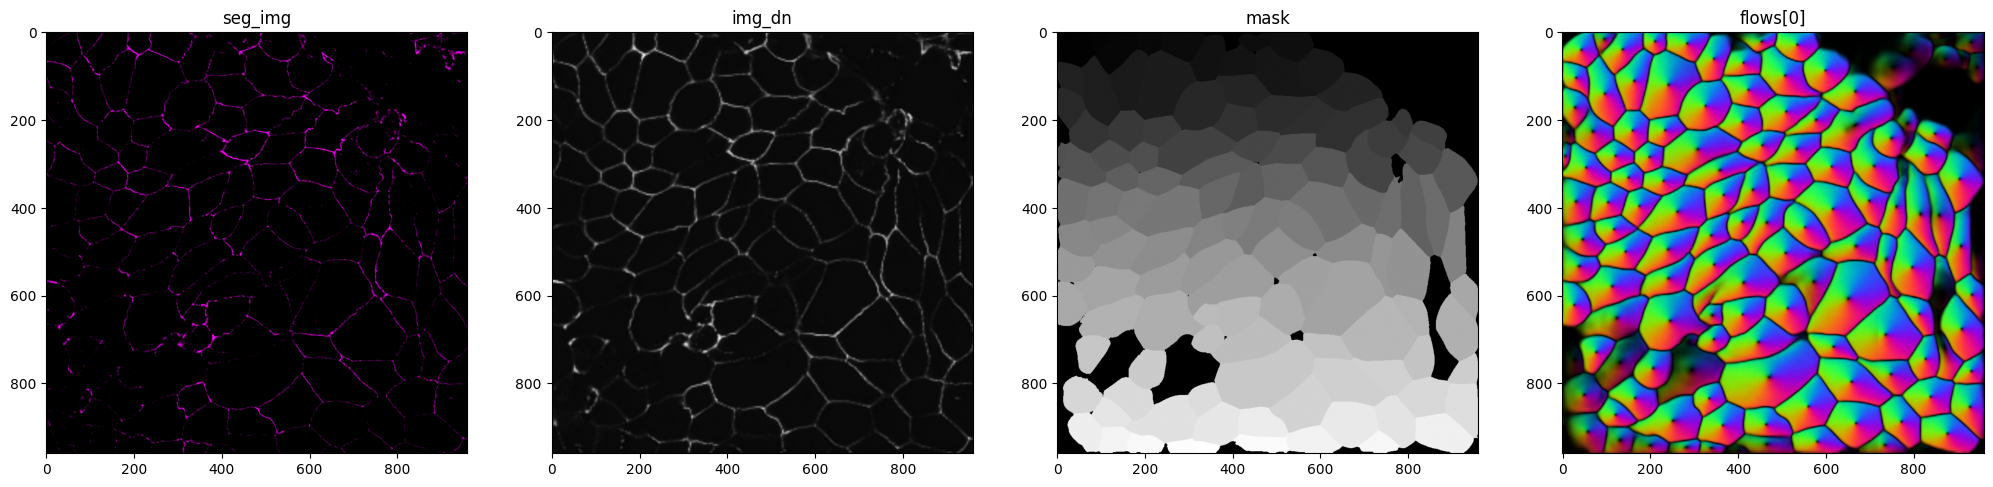

In [29]:
fig, ax = plt.subplots(1, 4, figsize=(25,10))
ax[0].imshow(seg_img)
ax[0].set_title('seg_img')
ax[1].imshow(img_dn, cmap='gray')
ax[1].set_title('img_dn')
ax[2].imshow(mask, cmap='gray')
ax[2].set_title('mask')
ax[3].imshow(flows[0], cmap='gray')
ax[3].set_title('flows[0]')
plt.show()

### Get means for ciliated and infected, set the means appropriately

In [30]:
dilation_for_mean = 0
cil_means, cil_means_list, cil_means_mask = get_means(signal_cil, mask, dilate=dilation_for_mean)
inf_means, inf_means_list, inf_means_mask = get_means(signal_inf, mask, dilate=dilation_for_mean)

22 15


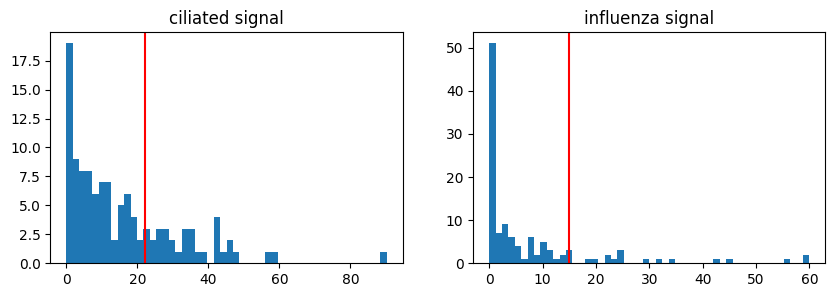

In [31]:
# cil_thresh = np.median(cil_means_list)
# cil_thresh = np.percentile(cil_means_list, 50)
# cil_thresh = 15
cil_thresh = threshold_otsu(np.array(cil_means_list)).astype(int)

# inf_thresh = np.median(inf_means_list)
# inf_thresh = np.percentile(inf_means_list, 75)
# inf_thresh = 7
inf_thresh = threshold_otsu(np.array(inf_means_list)).astype(int)

print(cil_thresh, inf_thresh)

fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].hist(cil_means_list, bins=50)
ax[0].set_title('ciliated signal')
ax[1].hist(inf_means_list, bins=50)
ax[1].set_title('influenza signal')
ax[0].axvline(cil_thresh, color='r')
ax[1].axvline(inf_thresh, color='r')
plt.show()

### Extract bins

In [32]:
cil_bins, cil_bins_list, cil_bins_mask = get_bins(cil_means, cil_thresh, mask)
inf_bins, inf_bins_list, inf_bins_mask = get_bins(inf_means, inf_thresh, mask)

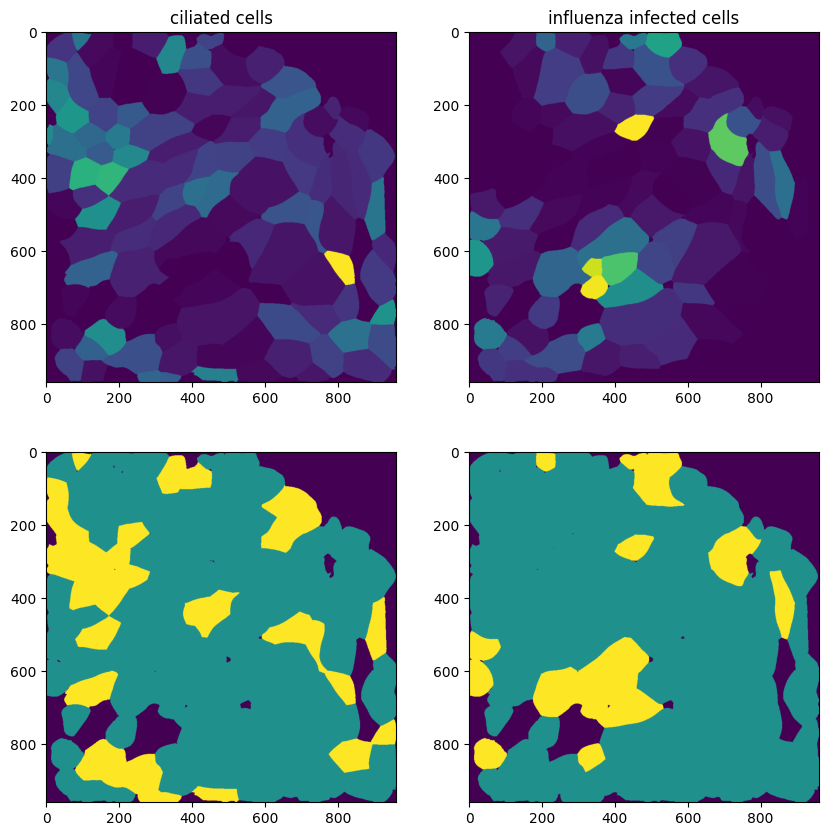

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0,0].set_title('ciliated cells')
ax[0,0].imshow(cil_means_mask, cmap='viridis')
ax[0,1].imshow(inf_means_mask, cmap='viridis')
ax[0,1].set_title('influenza infected cells')
ax[1,0].imshow(cil_bins_mask, cmap='viridis')
ax[1,1].imshow(inf_bins_mask, cmap='viridis')
plt.show()

## Get the different populations

In [38]:
populations = {1: 'non-ciliated & non-infected',
               2: 'non-ciliated & infected',
               3: 'ciliated & non-infected',
               4: 'ciliated & infected'}

{1: 1, 2: 3, 3: 1, 4: 2, 5: 1, 6: 2, 7: 2, 8: 3, 9: 3, 10: 2, 11: 1, 12: 1, 13: 1, 14: 1, 15: 3, 16: 3, 17: 1, 18: 1, 19: 3, 20: 1, 21: 1, 22: 3, 23: 1, 24: 3, 25: 1, 26: 1, 27: 3, 28: 2, 29: 1, 30: 1, 31: 2, 32: 2, 33: 1, 34: 1, 35: 3, 36: 3, 37: 3, 38: 3, 39: 1, 40: 1, 41: 1, 42: 1, 43: 3, 44: 1, 45: 1, 46: 3, 47: 1, 48: 1, 49: 2, 50: 1, 51: 1, 52: 1, 53: 3, 54: 1, 55: 3, 56: 3, 57: 1, 58: 3, 59: 3, 60: 1, 61: 1, 62: 1, 63: 3, 64: 1, 65: 1, 66: 3, 67: 1, 68: 3, 69: 1, 70: 2, 71: 1, 72: 2, 73: 1, 74: 1, 75: 1, 76: 1, 77: 2, 78: 1, 79: 2, 80: 1, 81: 3, 82: 3, 83: 1, 84: 2, 85: 2, 86: 2, 87: 2, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 3, 94: 1, 95: 1, 96: 1, 97: 2, 98: 3, 99: 3, 100: 2, 101: 1, 102: 3, 103: 1, 104: 3, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 3, 115: 3, 116: 3}
{1: 65, 2: 18, 3: 33, 4: 0}


influenza infected   1   2
ciliated                  
1                   65  18
2                   33   0

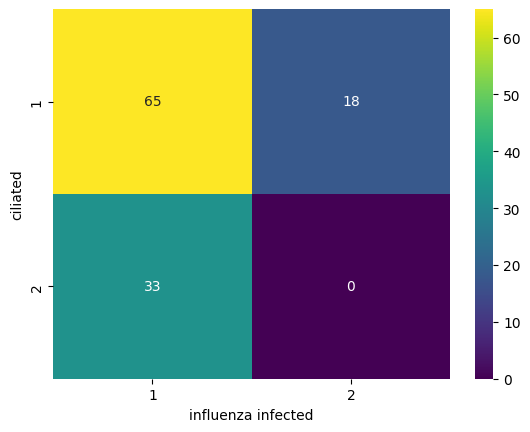

In [34]:
cell_pop_dict, pop_counts, pop_counts_df, pop_counts_matrix_dfs = get_pop(cil_bins, inf_bins, "ciliated", "influenza infected")
print(cell_pop_dict, pop_counts, sep='\n')
display(pop_counts_matrix_dfs)
sns.heatmap(pop_counts_matrix_dfs, annot=True, cmap='viridis')
plt.show()

Show in the image where the different cell types are located

In [35]:
pop_mask = get_pop_mask(cell_pop_dict, mask)
print(np.unique(pop_mask))

[0 1 2 3]


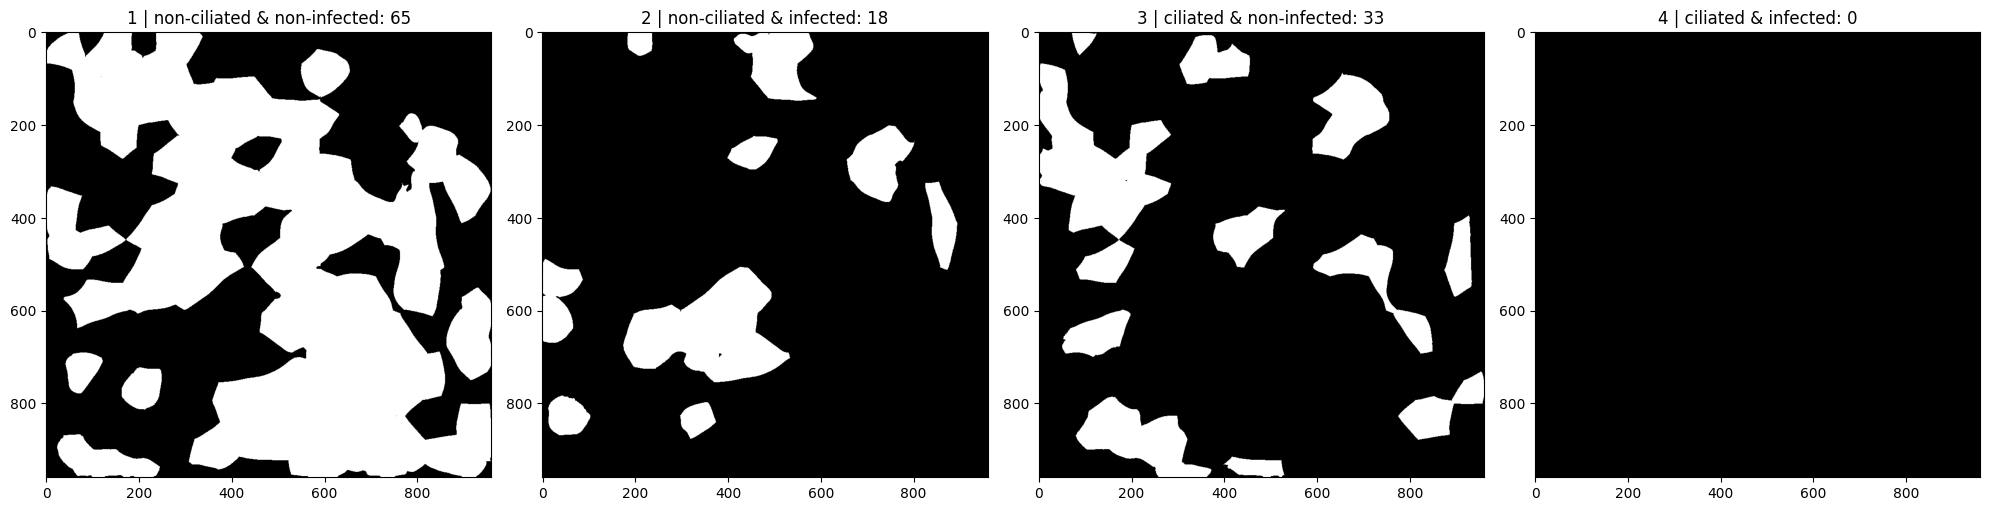

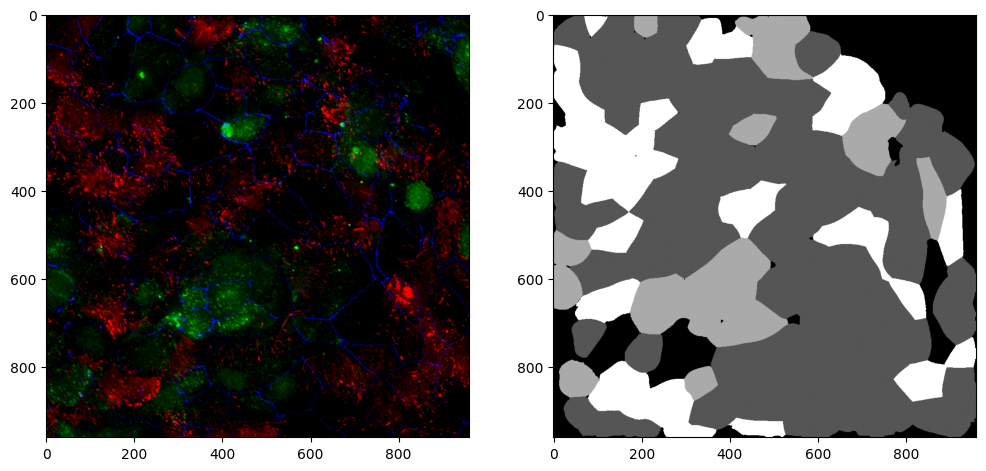

In [39]:
fig, ax = plt.subplots(1, 4, figsize=(20,5))
for pop in populations:
    ax[pop-1].imshow(pop_mask==pop, cmap='gray')
    ax[pop-1].set_title(f"{pop} | {populations[pop]}: {pop_counts[pop]}")
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(1, 2, figsize=(12,6))
img_rgb = np.stack([signal_cil[:,:,0], signal_inf[:,:,1], seg_img[:,:,2]], axis=2)
ax[0].imshow(img_rgb)
ax[1].imshow(pop_mask, cmap='grey')
plt.show()

In [40]:
v = napari.Viewer()
v.add_image(img_rgb, name='RGB')
v.add_labels(pop_mask, name='populations')

<Labels layer 'populations' at 0x2ba1218ad50>

# Test batch processing

In [41]:
folder = "C:/Users/roman/Documents/Vetsuisse/imaging_data/2022.10_IAV - Figure_7 - D_2405 - 36h - WT/"
seg_input = [read_image(folder + f"C3-MAX_1518_2405_WT_36hpi_00{n}_R3D_D3D-1.tif") for n in range(1, 4)]
cil_input = [read_image(folder + f"C4-MAX_1518_2405_WT_36hpi_00{n}_R3D_D3D-1.tif") for n in range(1, 4)]
inf_input = [read_image(folder + f"C2-MAX_1518_2405_WT_36hpi_00{n}_R3D_D3D-1.tif") for n in range(1, 4)]

3 images 255 cells
[(0, 255, 4.635652488425926), (0, 255, 29.590693721064813), (0, 255, 21.621155237268518)]


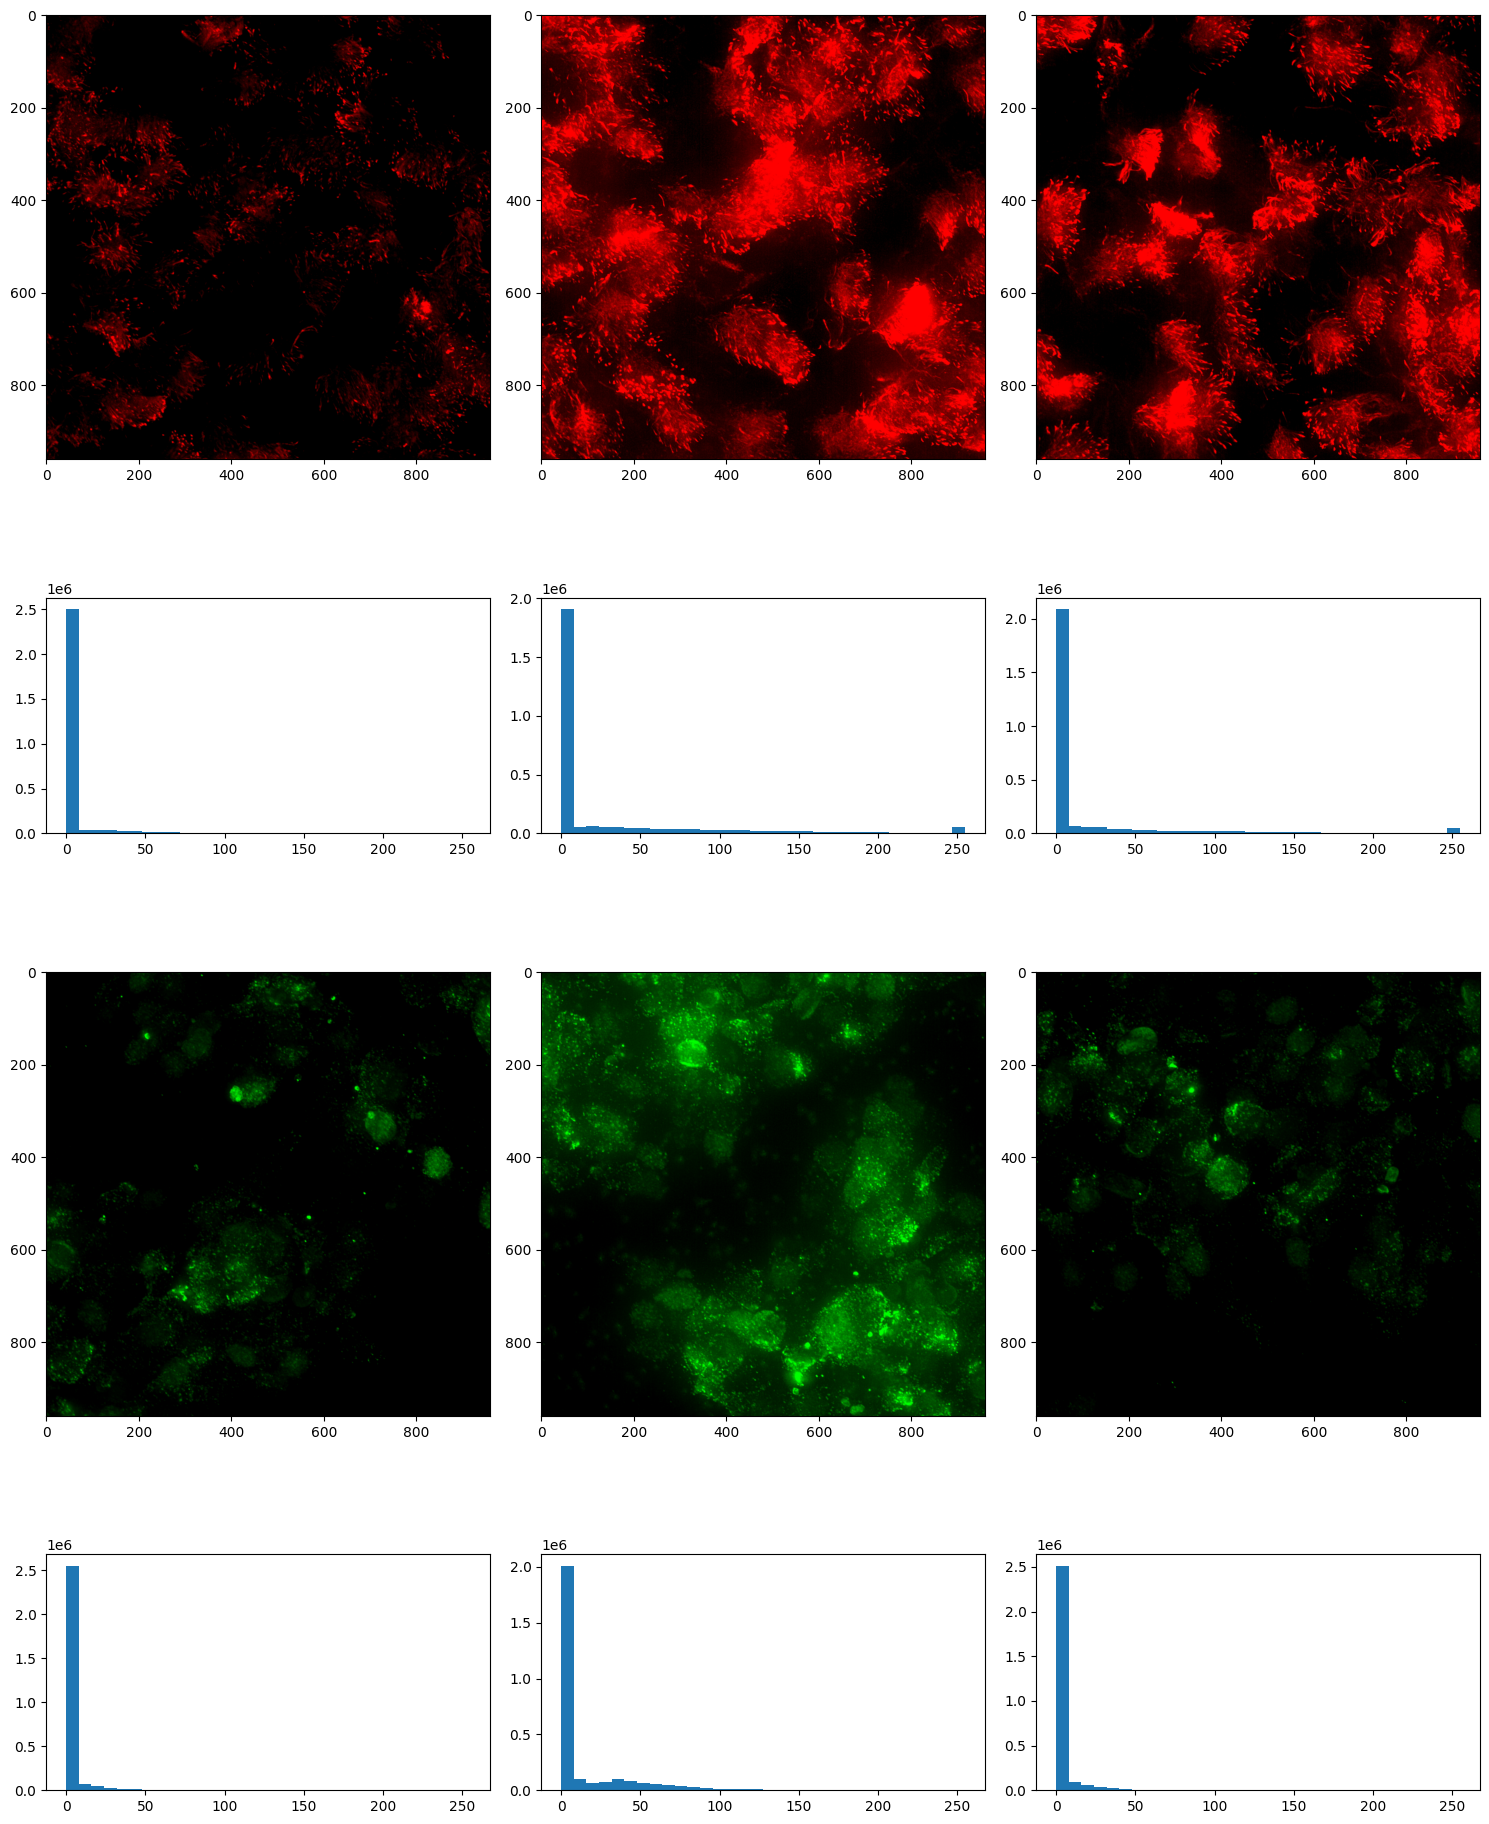

In [42]:
num_imgs = len(cil_input)
max_id = np.max(cil_input)
print(num_imgs, "images", max_id, "cells")

print([(img.min(), img.max(), img.mean()) for img in cil_input])

fig, ax = plt.subplots(4, num_imgs, figsize=(num_imgs*5, 20), gridspec_kw={'height_ratios': [1, 0.3, 1, 0.3]})
for i in range(num_imgs):
    ax[0, i].imshow(cil_input[i])
    ax[1, i].hist(cil_input[i].flatten(), bins=32)
    ax[2, i].imshow(inf_input[i])
    ax[3, i].hist(inf_input[i].flatten(), bins=32)
plt.tight_layout()
plt.show()

[(47, 207, 55.62546875), (31, 100, 55.31992947048611), (38, 106, 55.34396918402778)]


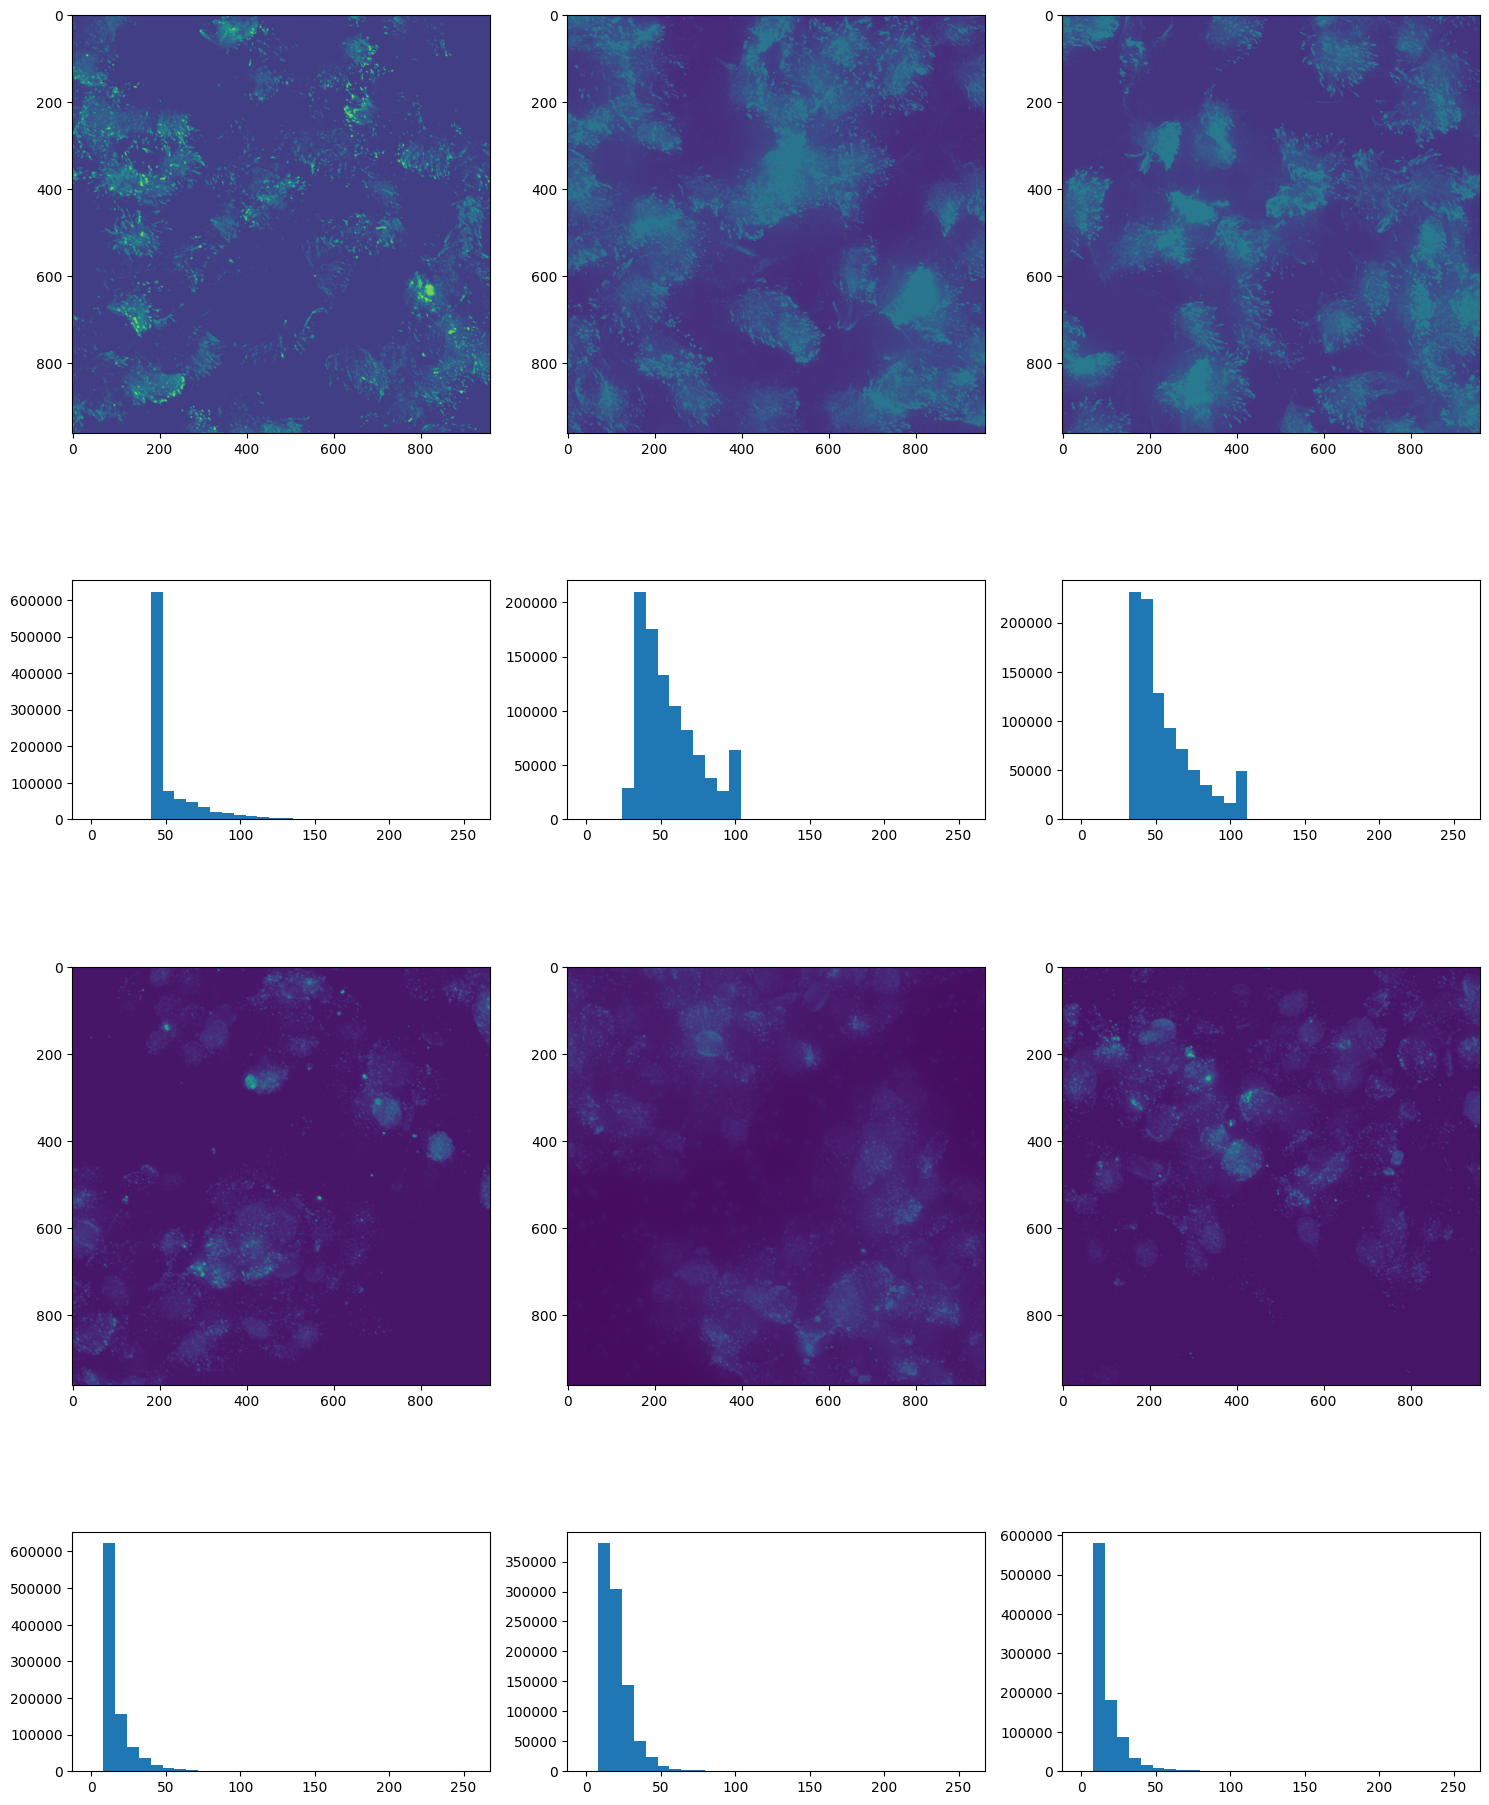

In [43]:
cil_in_norm = normalize(check_make_single_ch(cil_input))
inf_in_norm = normalize(check_make_single_ch(inf_input))
cil_input = cil_in_norm
inf_input = inf_in_norm

print([(img.min(), img.max(), img.mean()) for img in cil_in_norm])

fig, ax = plt.subplots(4, num_imgs, figsize=(num_imgs*5, 20), gridspec_kw={'height_ratios': [1, 0.3, 1, 0.3]})
for i in range(num_imgs):
    ax[0, i].imshow(cil_in_norm[i], vmin=0, vmax=255)
    ax[1, i].hist(cil_in_norm[i].flatten(), bins=32, range=(0,255))
    ax[2, i].imshow(inf_in_norm[i], vmin=0, vmax=255)
    ax[3, i].hist(inf_in_norm[i].flatten(), bins=32, range=(0,255))
plt.tight_layout()
plt.show()

In [ ]:
masks, flows, styles, imgs_dn, outlines = segment(seg_input, 100)
print(len(masks), len(flows), len(styles), len(imgs_dn))

3 3 3 3


3 images 355 cells


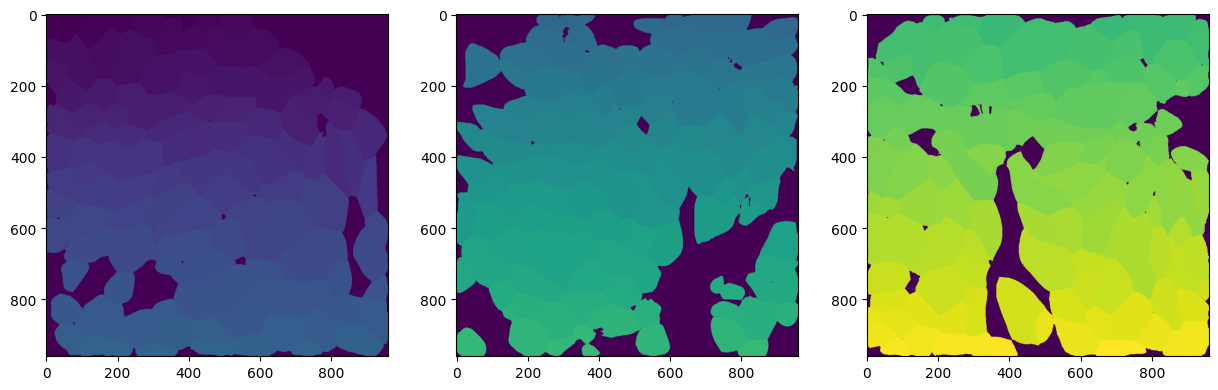

In [45]:
num_imgs = len(masks)
max_id = np.max(masks)
print(num_imgs, "images", max_id, "cells")

fig, ax = plt.subplots(1, num_imgs, figsize=(num_imgs*5, 5))
for i in range(num_imgs):
    ax[i].imshow(masks[i], vmin=0, vmax=max_id)
plt.show()

In [46]:
cil_means, cil_means_lists, cil_means_masks = get_means(cil_input, masks)
inf_means, inf_means_lists, inf_means_masks = get_means(inf_input, masks)

print(len(cil_means), len(cil_means_lists), len(cil_means_masks))
print(max(cil_means[0].keys()), max(cil_means[1].keys()), max(cil_means[2].keys()))
print(len(inf_means), len(inf_means_lists), len(inf_means_masks))
print(max(inf_means[0].keys()), max(inf_means[1].keys()), max(inf_means[2].keys()))

print(cil_means[0])

3 3 3
116 239 355
3 3 3
116 239 355
{1: 55.32843959731544, 2: 68.60923076923076, 3: 48.29305439330544, 4: 47.0, 5: 51.519098548510314, 6: 58.49460580912863, 7: 47.028200371057515, 8: 73.08740912095175, 9: 60.7668337328394, 10: 48.96639930630826, 11: 51.87824717921805, 12: 47.86073915372255, 13: 47.077130873675976, 14: 58.86242299794661, 15: 68.82779030439684, 16: 61.91216216216216, 17: 56.02318084126497, 18: 47.217403790924756, 19: 72.91490362012223, 20: 51.193596611436405, 21: 50.49255533199195, 22: 64.74240904531777, 23: 51.43770240327254, 24: 76.62319615179048, 25: 52.291666666666664, 26: 58.04679191775966, 27: 62.791657322269565, 28: 48.854542111070245, 29: 48.21190130624093, 30: 57.79103978602474, 31: 54.78495575221239, 32: 47.76844583987441, 33: 54.1079894644425, 34: 51.05167124172453, 35: 65.8403665300217, 36: 70.31816897428652, 37: 73.64732142857143, 38: 67.59066646332164, 39: 56.619281045751634, 40: 56.09312320916906, 41: 51.32697508896797, 42: 58.220172201722015, 43: 63.06184

Cil thresh: 59.09169336842747
Inf thresh: 22.660146442417428


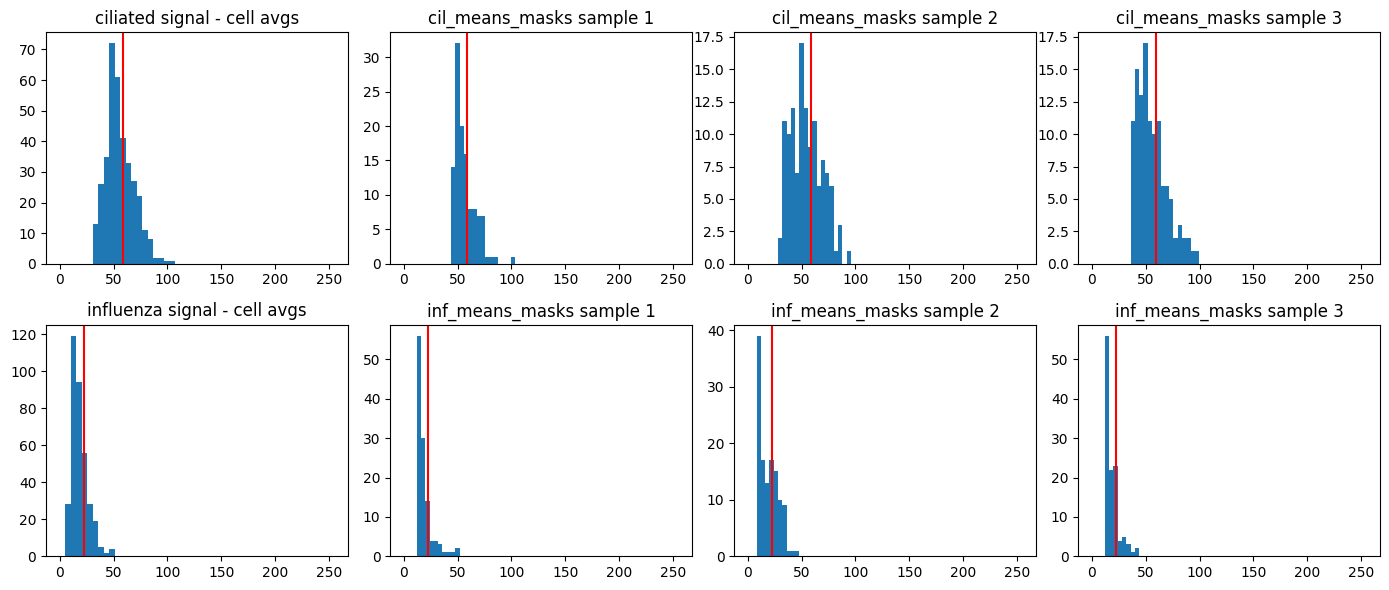

In [47]:
all_cil_means = np.concatenate(cil_means_lists)
all_inf_means = np.concatenate(inf_means_lists)

cil_thresh = threshold_otsu(all_cil_means)
inf_thresh = threshold_otsu(all_inf_means)
# cil_thresh = np.median(all_cil_means)
# inf_thresh = np.median(all_inf_means)
# cil_thresh = 15
# inf_thresh = 7
print("Cil thresh:", cil_thresh)
print("Inf thresh:", inf_thresh)

plt.figure(figsize=(14,6))
plt.subplot(2,4,1)
plt.hist(all_cil_means, bins=50, range=(0,255))
plt.title('ciliated signal - cell avgs')
plt.axvline(cil_thresh, color='r')
for i in range(3):
    plt.subplot(2,4,2+i)
    plt.hist(cil_means_lists[i], bins=64, range=(0,255))
    plt.title(f'cil_means_masks sample {i+1}')
    plt.axvline(cil_thresh, color='r')

plt.subplot(2,4,5)
plt.hist(all_inf_means, bins=50, range=(0,255))
plt.title('influenza signal - cell avgs')
plt.axvline(inf_thresh, color='r')
for i in range(3):
    plt.subplot(2,4,6+i)
    plt.hist(inf_means_lists[i], bins=64, range=(0,255))
    plt.title(f'inf_means_masks sample {i+1}')
    plt.axvline(inf_thresh, color='r')

plt.tight_layout()
plt.show()

In [48]:
sum(all_cil_means > cil_thresh), sum(all_inf_means > inf_thresh)

(120, 83)

In [49]:
cil_bins, cil_bins_lists, cil_bins_masks = get_bins(cil_means, thresh=cil_thresh, cell_masks_in=masks)
inf_bins, inf_bins_lists, inf_bins_masks = get_bins(inf_means, thresh=inf_thresh, cell_masks_in=masks)

print(len(cil_bins), len(cil_bins_lists), len(cil_bins_masks))
print(len(inf_bins), len(inf_bins_lists), len(inf_bins_masks))

print(cil_bins[0])
print(sum([1 if v == 2 else 0 for v in cil_bins[0].values()]))

3 3 3
3 3 3
{1: 1, 2: 2, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 2, 9: 2, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 2, 16: 2, 17: 1, 18: 1, 19: 2, 20: 1, 21: 1, 22: 2, 23: 1, 24: 2, 25: 1, 26: 1, 27: 2, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 2, 36: 2, 37: 2, 38: 2, 39: 1, 40: 1, 41: 1, 42: 1, 43: 2, 44: 1, 45: 1, 46: 2, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 2, 54: 1, 55: 2, 56: 2, 57: 1, 58: 2, 59: 2, 60: 1, 61: 1, 62: 1, 63: 2, 64: 1, 65: 1, 66: 2, 67: 1, 68: 2, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 2, 82: 2, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 2, 94: 2, 95: 1, 96: 1, 97: 1, 98: 2, 99: 2, 100: 1, 101: 2, 102: 2, 103: 1, 104: 2, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 2, 115: 2, 116: 2}
35


In [50]:
pop_dicts, pop_counts, pop_counts_dfs, pop_counts_matrix_dfs = get_pop(cil_bins, inf_bins,
                                                                       bin1_name="cil", bin2_name="inf")

print(len(pop_dicts), len(pop_counts), len(pop_counts_dfs))

print(pop_dicts[0])
print(pop_counts[0])

display(pop_counts_dfs[0])
display(pop_counts_matrix_dfs[0])

3 3 3
{1: 1, 2: 3, 3: 1, 4: 2, 5: 1, 6: 2, 7: 2, 8: 3, 9: 3, 10: 2, 11: 1, 12: 1, 13: 1, 14: 1, 15: 3, 16: 3, 17: 1, 18: 2, 19: 3, 20: 1, 21: 1, 22: 3, 23: 1, 24: 3, 25: 1, 26: 1, 27: 3, 28: 2, 29: 1, 30: 1, 31: 2, 32: 2, 33: 1, 34: 1, 35: 3, 36: 3, 37: 3, 38: 3, 39: 1, 40: 1, 41: 1, 42: 1, 43: 3, 44: 2, 45: 1, 46: 3, 47: 1, 48: 1, 49: 2, 50: 1, 51: 1, 52: 1, 53: 3, 54: 1, 55: 3, 56: 3, 57: 1, 58: 3, 59: 3, 60: 1, 61: 1, 62: 1, 63: 3, 64: 1, 65: 1, 66: 3, 67: 1, 68: 3, 69: 1, 70: 2, 71: 1, 72: 2, 73: 1, 74: 1, 75: 1, 76: 1, 77: 2, 78: 1, 79: 2, 80: 1, 81: 3, 82: 3, 83: 1, 84: 2, 85: 2, 86: 2, 87: 2, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 3, 94: 3, 95: 1, 96: 1, 97: 2, 98: 3, 99: 3, 100: 2, 101: 3, 102: 4, 103: 1, 104: 3, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 3, 115: 3, 116: 3}
{1: 61, 2: 20, 3: 34, 4: 1}


non-cil & non-inf  non-cil & inf  cil & non-inf  cil & inf
0                 61             20             34          1

inf   1   2
cil        
1    61  20
2    34   1

inf    1   2
cil         
1    168  67
2    104  16

inf         1         2
cil                    
1    0.473239  0.188732
2    0.292958  0.045070

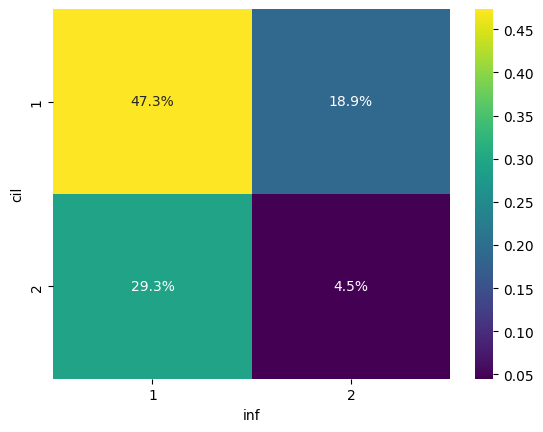

In [51]:
overall_count_matrix_df = sum(pop_counts_matrix_dfs)
display(overall_count_matrix_df)
overall_pop_perc = overall_count_matrix_df / overall_count_matrix_df.sum().sum()
display(overall_pop_perc)
sns.heatmap(overall_pop_perc, annot=True, cmap='viridis', fmt=".1%")
plt.show()

non-cil & non-inf  non-cil & inf  cil & non-inf  cil & inf
Sample1                 61             20             34          1
Sample2                 49             31             33         10
Sample3                 58             16             37          5

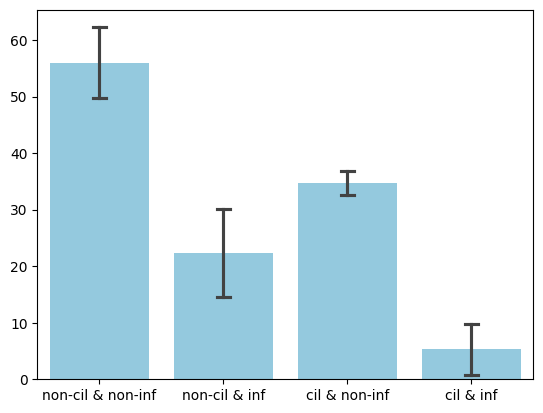

In [52]:
overall_count_df = pd.concat(pop_counts_dfs)
# Set the row names
overall_count_df.index = ["Sample1", "Sample2", "Sample3"]
display(overall_count_df)
sns.barplot(data=overall_count_df, errorbar='sd', color='skyblue', capsize=0.1)
plt.show()

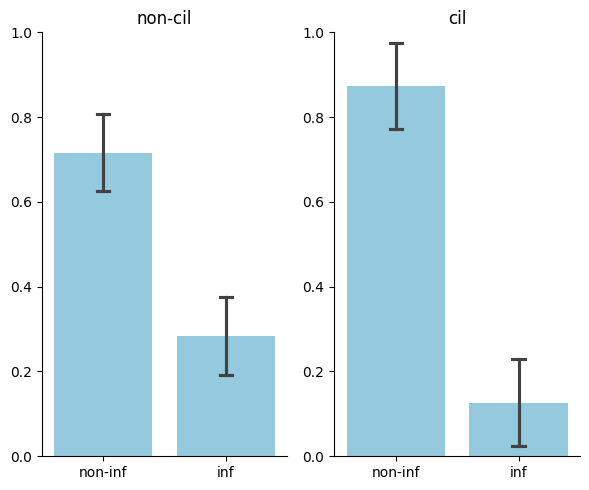

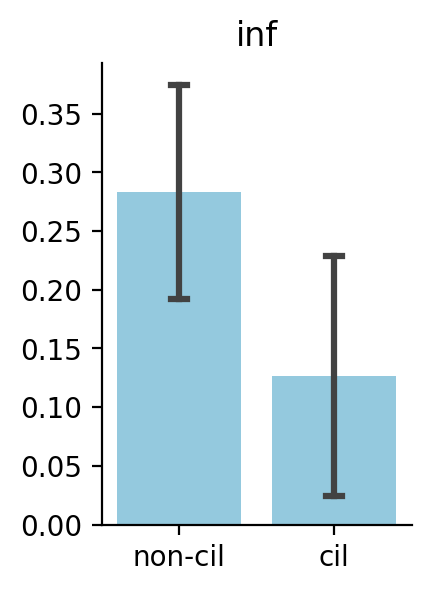

In [53]:
abs, rel = get_sep_rel_pop_counts_df(overall_count_df, "cil", "inf")
plot_bins(rel)
plot_bin2_in_bin1(rel)
plt.show()

## Use Wrapper Function

signal1_thresh 59.01767747333054
signal2_thresh 21.999301394314685


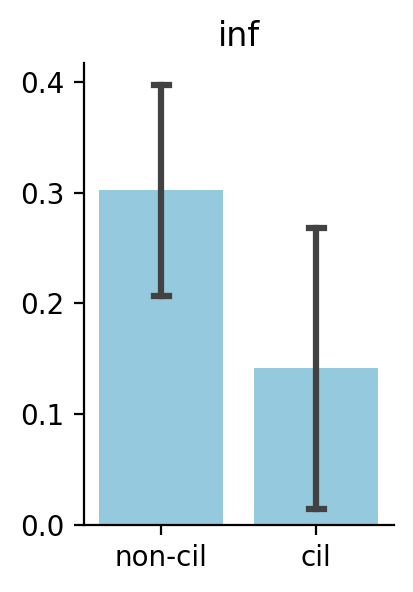

non-cil & non-inf  non-cil & inf  cil & non-inf  cil & inf
Sample1                 61             20             34          1
Sample2                 47             33             31         12
Sample3                 55             18             38          5

In [67]:
sample_names = ["Sample1", "Sample2", "Sample3"]
# thresh_for_both = 'otsu-per-sample'
thresh_for_both = 'otsu_overall'
output = seg_mean_bin_pop(seg_input, cil_input, inf_input, masks=masks, norm=True,
                       diameter=100, dilate=0, signal1_thresh=thresh_for_both, signal2_thresh=thresh_for_both,
                       signal1_name="cil", signal2_name="inf", sample_names=sample_names,
                       plt_res=True)
masks_out, means_out, bins_out, cell_pop_dicts_out, pop_counts_out, overall_count_df_out, rel_out = output
display(overall_count_df_out)

# Test segmentation on multiple channels

In [ ]:
folder = "C:/Users/roman/Documents/Vetsuisse/imaging_data/2022.10_IAV - Figure_7 - D_1904 - 36hpi - NS1/"
seg_img1 = read_image(folder + "C1-MAX_1518_1904_NS1_36hpi_002_R3D_D3D-1.tif")
seg_img2 = read_image(folder + "C3-MAX_1518_1904_NS1_36hpi_002_R3D_D3D-1.tif")
print([np.min(seg_img1[:,:,x]) for x in range(3)], [np.min(seg_img2[:,:,x]) for x in range(3)])
print([np.max(seg_img1[:,:,x]) for x in range(3)], [np.max(seg_img2[:,:,x]) for x in range(3)])
seg_img_2ch = np.zeros((seg_img1.shape[0], seg_img1.shape[1], 3), dtype=np.uint8)
seg_img_2ch[:,:,0] = seg_img1[:,:,2]
seg_img_2ch[:,:,1] = seg_img2[:,:,0]

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(seg_img1[2].flatten(), bins=50)
ax[1].hist(seg_img2[0].flatten(), bins=50)
plt.show()

In [ ]:
model = denoise.CellposeDenoiseModel(gpu=use_GPU, model_type="cyto3",
                                     restore_type="denoise_cyto3")

masks, flows, styles, imgs_dn = model.eval([seg_img_2ch], diameter=[100], channels=[0,0])
mask, flows, styles, img_dn = masks[0], flows[0], styles[0], imgs_dn[0]

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15,5))
ax[0].imshow(seg_img_2ch)
ax[0].set_title('seg_img')
ax[1].imshow(img_dn, cmap='gray')
ax[1].set_title('img_dn')
ax[2].imshow(mask, cmap='gray')
ax[2].set_title('mask')
ax[3].imshow(flows[0], cmap='gray')
ax[3].set_title('flows[0]')
plt.show()

# Archived Code

In [ ]:
populations = {1: 'non-ciliated & non-infected',
               2: 'ciliated & non-infected',
               3: 'non-ciliated & infected',
               4: 'ciliated & infected'}
cell_types = {id: 1 if cil_bins[id]==1 and inf_bins[id]==1
              else 2 if cil_bins[id]==2 and inf_bins[id]==1
              else 3 if cil_bins[id]==1 and inf_bins[id]==2
              else 4
              for id in range(1, np.max(mask)+1)}
print(cell_types)

In [ ]:
pop_counts = {pop: len([id for id in cell_types if cell_types[id]==pop]) for pop in populations}
print(pop_counts)

In [ ]:
# Create a DataFrame with ciliated vs. not in columns and infected vs. not in rows
cil = {'non-infected': pop_counts[2], 'infected': pop_counts[4]}
non_cil = {'non-infected': pop_counts[1], 'infected': pop_counts[3]}
pop_counts_df = pd.DataFrame([cil, non_cil], index=['ciliated', 'non-ciliated'])

In [ ]:
pop_mask = np.zeros_like(mask, dtype=np.int32)
for id in range(1, mask.max()+1):
    single_mask = mask == id
    cell_bin = cell_types[id]
    pop_mask += cell_bin * single_mask
pop_mask = pop_mask.astype(np.uint8)
print(np.unique(pop_mask))